# **Online Retail Transactions Visualisation**

## Objectives

* Write your notebook objective here, for example, "Fetch data from Kaggle and save as raw data", or "engineer features for modelling"

## Inputs

* Write down which data or information you need to run the notebook 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [2]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\Code projects\\Hackathon-group4\\online-retail-transactions-analysis\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [3]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [4]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\fanxi\\OneDrive\\Documents\\Code projects\\Hackathon-group4\\online-retail-transactions-analysis'

---

# Initial Setup

Import neccessary python libaries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
import scipy.stats as stats
from scipy.stats import shapiro
from scipy.stats import skewnorm
from scipy.stats import f_oneway
from scipy.stats import kruskal

Fetch dataset from compressed csv file

In [7]:
df = pd.read_csv("DataSet/Cleaned/fact_sales_clean.zip", compression='zip')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Home-Light,Wednesday,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Home-Light,Wednesday,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Drinkware,Wednesday,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Bottles,Wednesday,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Romance,Wednesday,8


---

# Descriptive Statistics

Section 1 content

In [8]:
print("DataFrame Info:")
df.info()

print("\nDataFrame Shape:")
print(df.shape)


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534684 entries, 0 to 534683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   InvoiceNo        534684 non-null  object 
 1   StockCode        534684 non-null  object 
 2   Description      534684 non-null  object 
 3   Quantity         534684 non-null  int64  
 4   InvoiceDate      534684 non-null  object 
 5   UnitPrice        534684 non-null  float64
 6   CustomerID       534684 non-null  int64  
 7   Country          534684 non-null  object 
 8   TotalSales       534684 non-null  float64
 9   ProductCategory  534684 non-null  object 
 10  DayOfWeek        534684 non-null  object 
 11  Hour             534684 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 49.0+ MB

DataFrame Shape:
(534684, 12)


"InvoiceDate" has a object dtype. Would be better to convert to datetime

In [9]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534684 entries, 0 to 534683
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   InvoiceNo        534684 non-null  object        
 1   StockCode        534684 non-null  object        
 2   Description      534684 non-null  object        
 3   Quantity         534684 non-null  int64         
 4   InvoiceDate      534684 non-null  datetime64[ns]
 5   UnitPrice        534684 non-null  float64       
 6   CustomerID       534684 non-null  int64         
 7   Country          534684 non-null  object        
 8   TotalSales       534684 non-null  float64       
 9   ProductCategory  534684 non-null  object        
 10  DayOfWeek        534684 non-null  object        
 11  Hour             534684 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 49.0+ MB


In [10]:
print("Numeric Columns Summary:")
print(df.describe())

Numeric Columns Summary:
            Quantity                    InvoiceDate      UnitPrice  \
count  534684.000000                         534684  534684.000000   
mean        9.673600  2011-07-04 11:15:02.198532096       4.646824   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 10:14:45       1.250000   
50%         3.000000            2011-07-19 15:23:00       2.080000   
75%        10.000000            2011-10-19 09:58:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       219.161905                            NaN      97.410535   

          CustomerID     TotalSales           Hour  
count  534684.000000  534684.000000  534684.000000  
mean    15283.334714      18.178914      13.075319  
min     12346.000000 -168469.600000       6.000000  
25%     14357.000000       3.750000      11.000000  
50%     15287.000000       9.900000      13.000000  
75%     16244.000000      

In [11]:
print("\nCategorical Columns Summary:")
print(df.describe(include="object"))


Categorical Columns Summary:
       InvoiceNo StockCode                         Description  \
count     534684    534684                              534684   
unique     24428      3958                                4211   
top       573585    85123A  WHITE HANGING HEART T-LIGHT HOLDER   
freq        1114      2301                                2357   

               Country ProductCategory DayOfWeek  
count           534684          534684    534684  
unique              36              30         6  
top     United Kingdom       Gift-Wrap  Thursday  
freq            488846          105496    102529  


In [12]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(f'{col} has {df[col].nunique()} unique values')

InvoiceNo has 24428 unique values
StockCode has 3958 unique values
Description has 4211 unique values
Country has 36 unique values
ProductCategory has 30 unique values
DayOfWeek has 6 unique values


---

# Time Based Trend Analysis

## Monthly Data

In [13]:
df['Month'] = df['InvoiceDate'].dt.month
df['Hour'] = df['InvoiceDate'].dt.hour
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,ProductCategory,DayOfWeek,Hour,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,Home-Light,Wednesday,8,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Home-Light,Wednesday,8,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,Drinkware,Wednesday,8,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Bottles,Wednesday,8,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,Romance,Wednesday,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534679,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,10.20,Multi-packs,Friday,12,12
534680,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,12.60,Toys,Friday,12,12
534681,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Toys,Friday,12,12
534682,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,16.60,Other,Friday,12,12


In [14]:
df_monthly = (
    df
    .groupby(df['Month'])
    .agg(Sales=('TotalSales', 'sum'),
         TrasactionsCount=('InvoiceNo', 'nunique'),
         ReturnsCount=('TotalSales', lambda x: (x < 0).sum()))
    .reset_index()
)
df_monthly

,Month,Sales,TrasactionsCount,ReturnsCount
0,1,558448.560,1362,700
1,2,497026.410,1328,470
2,3,682013.980,1818,696
3,4,491877.341,1516,558
4,5,721038.230,2022,621
5,6,689367.900,1917,708
6,7,678061.081,1767,684
7,8,680855.430,1653,669
8,9,1017312.382,2227,801
9,10,1069368.230,2533,1194


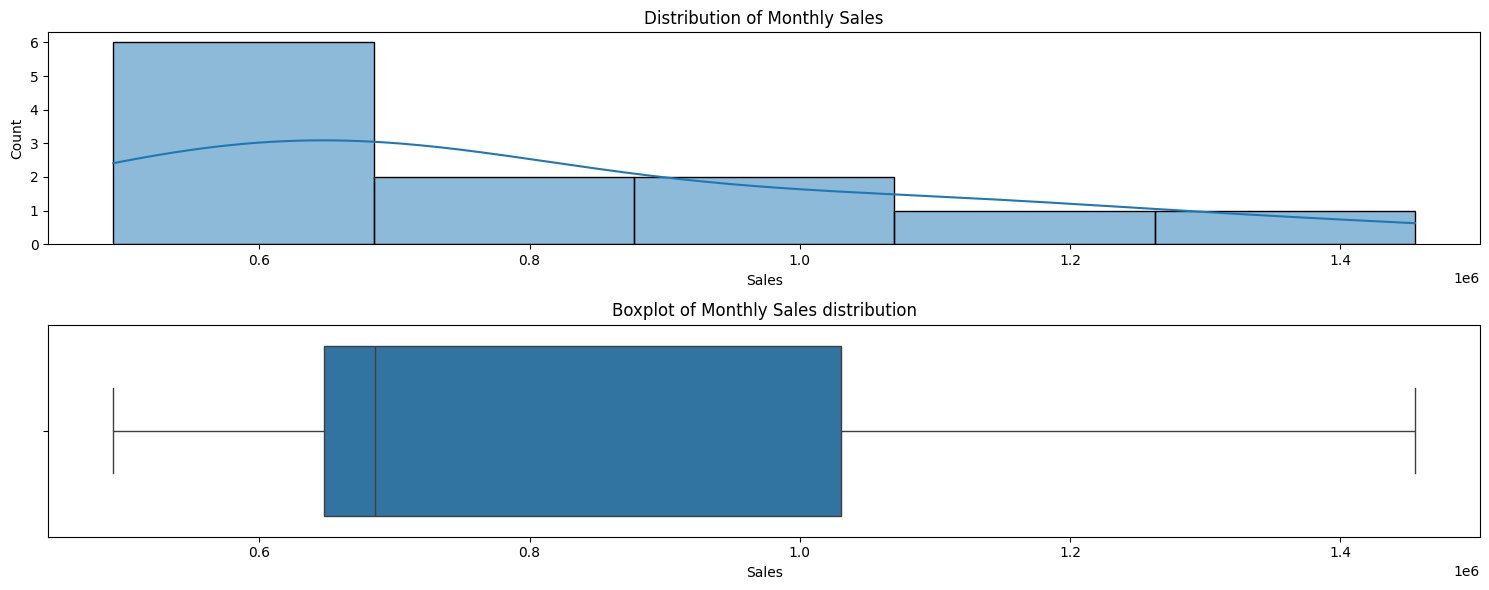

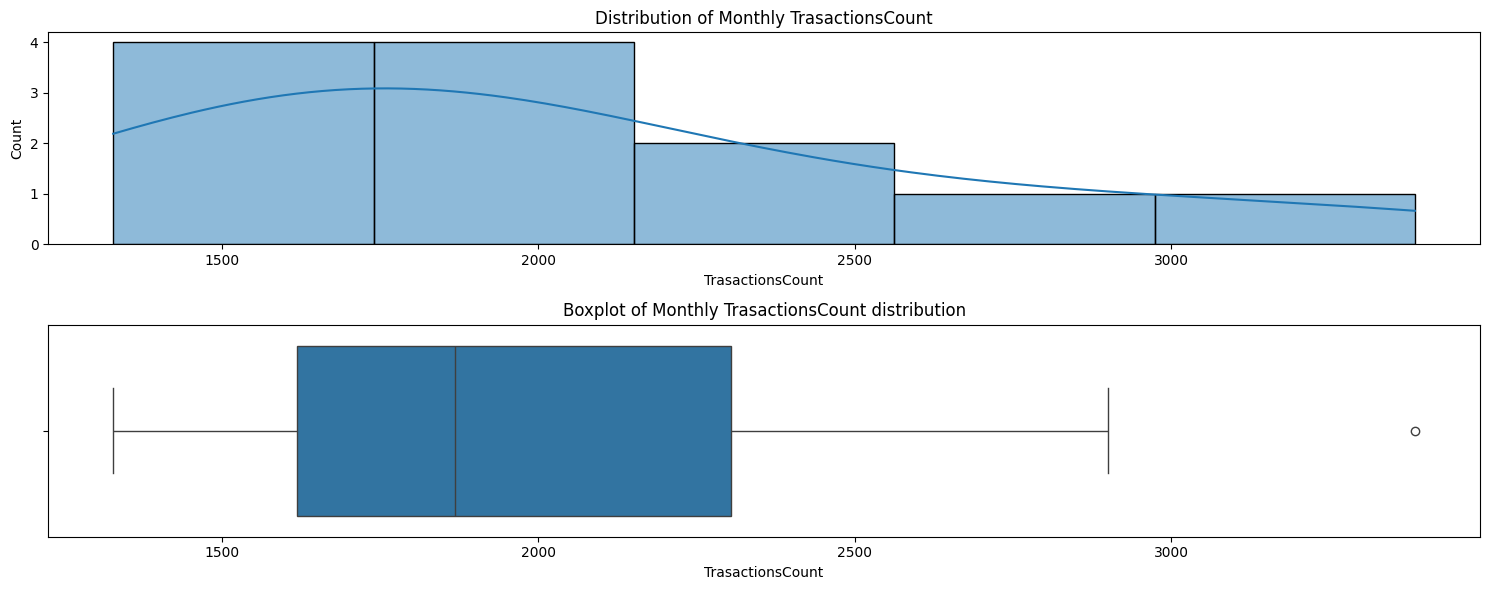

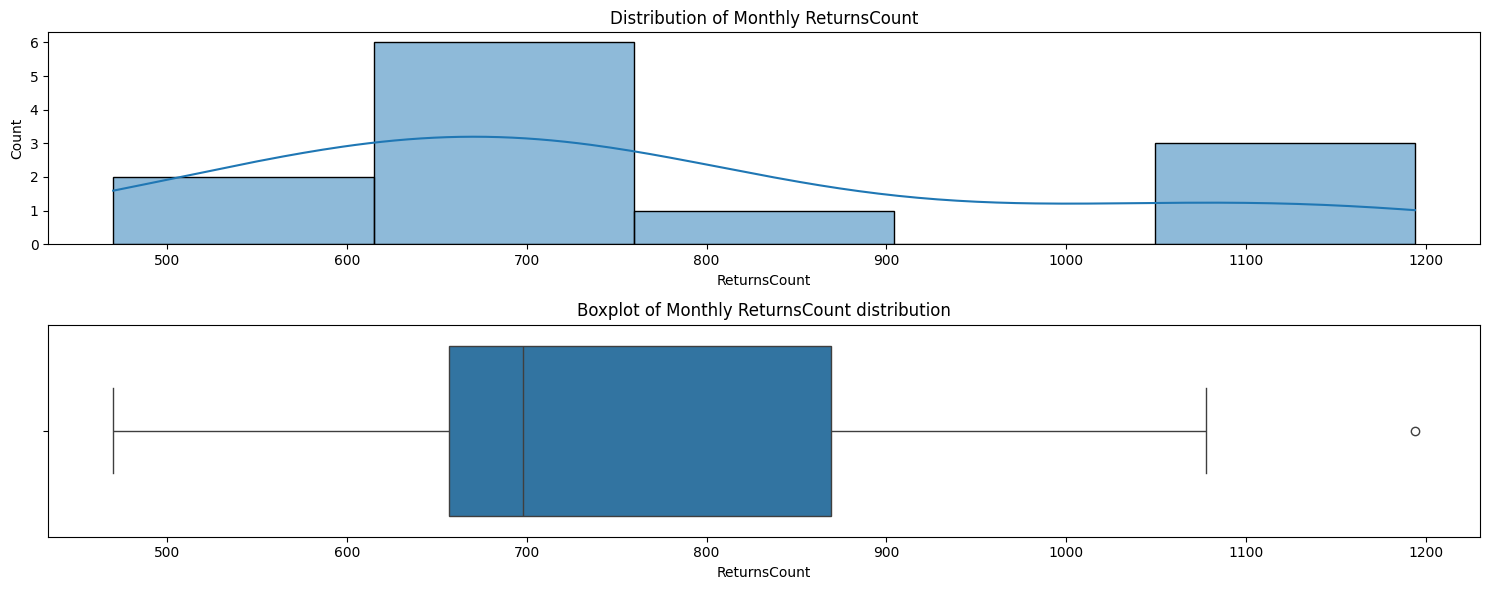

In [15]:
for col in df_monthly.columns[1:]:
    fig, ax = plt.subplots(2, 1, figsize=(15, 6))
    sns.histplot(df_monthly[col], kde=True, ax = ax[0])
    ax[0].set_title(f'Distribution of Monthly {col}')
    sns.boxplot(x=df_monthly[col], ax = ax[1])
    ax[1].set_title(f'Boxplot of Monthly {col} distribution')
    plt.tight_layout()
    plt.show()

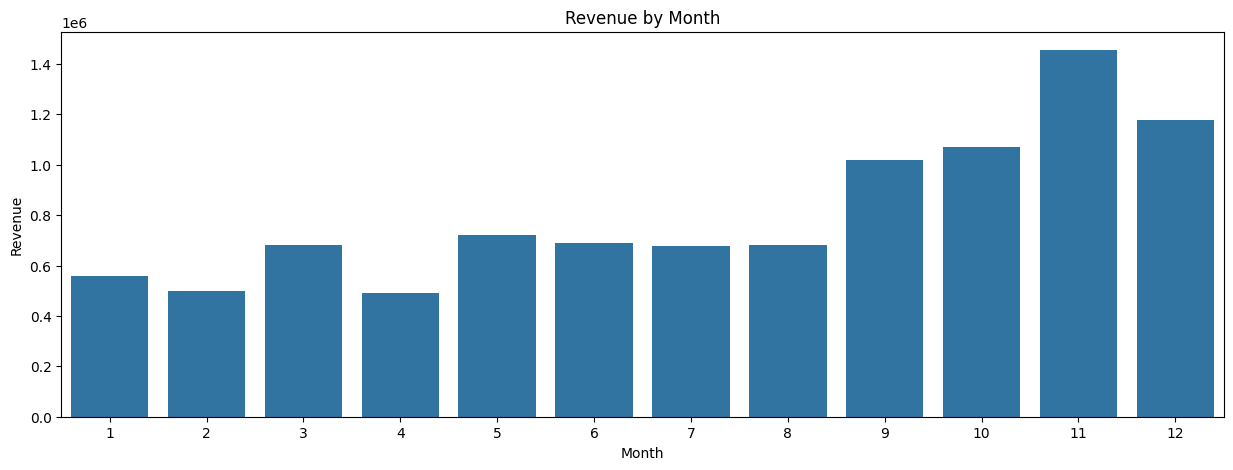

In [16]:
plt.figure(figsize=(15, 5))
sns.barplot(data=df_monthly, x='Month', y='Sales')
plt.title("Revenue by Month")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()


In [17]:
df_weekdays = (
    df.groupby(df['DayOfWeek'])
    .agg(TotalSales = ('TotalSales', 'sum'),
          AverageSales = ('TotalSales', 'mean'))
    .reset_index()
)
df_weekdays

,DayOfWeek,TotalSales,AverageSales
0,Friday,1537055.891,18.959848
1,Monday,1583834.391,16.812101
2,Sunday,798272.411,12.713976
3,Thursday,2106396.810,20.544400
4,Tuesday,1964659.531,19.507313
5,Wednesday,1729755.230,18.524425


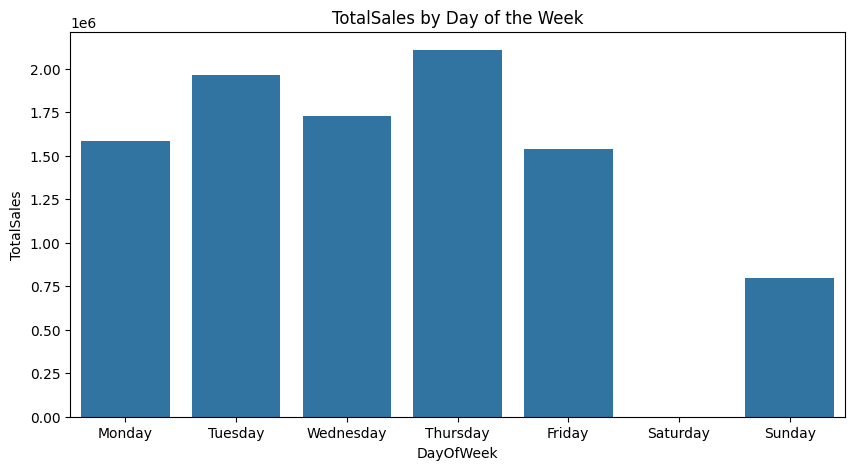

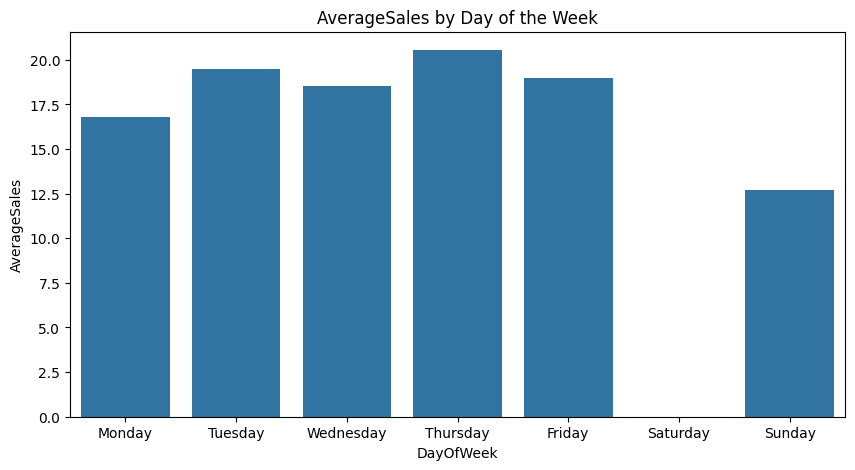

In [18]:
for col in df_weekdays.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=df_weekdays, x='DayOfWeek', y=col, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.title(f'{col} by Day of the Week')
    plt.show()

In [19]:
df_hourly = (
    df.groupby(df['Hour'])
    .agg(TotalSales = ('TotalSales', 'sum'),
          TransactionCount = ('InvoiceNo', 'count'),
          ReturnsCount = ('TotalSales', lambda x: (x < 0).sum()))
    .reset_index()
)
df_hourly

,Hour,TotalSales,TransactionCount,ReturnsCount
0,6,-497.350,41,40
1,7,31009.320,383,4
2,8,281723.020,8903,102
3,9,766280.621,34223,523
4,10,1325875.591,48607,1005
5,11,1146457.490,56793,1188
6,12,1356923.770,77324,1336
7,13,1172205.450,71081,1059
8,14,1090776.191,66327,1010
9,15,1185780.950,76633,893


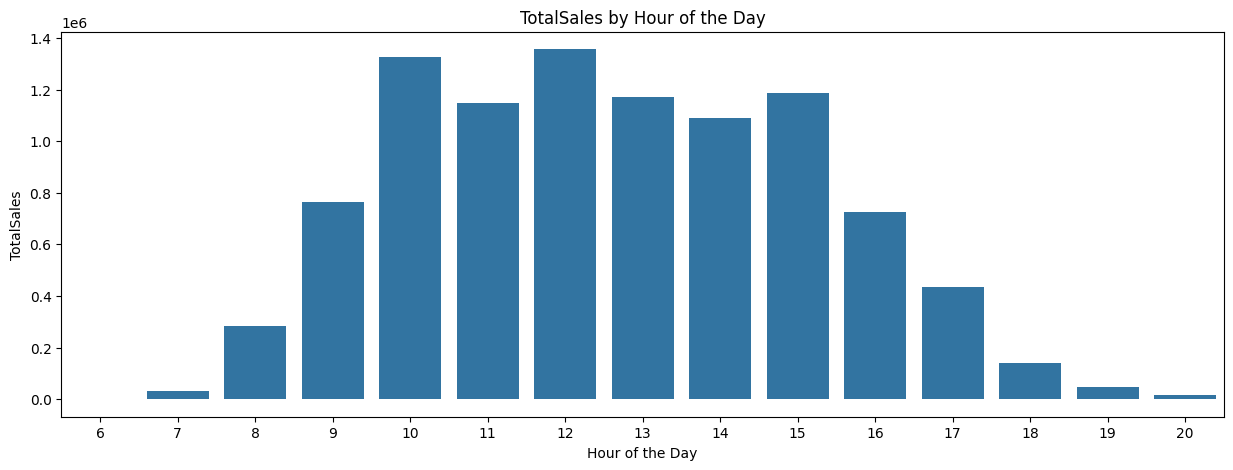

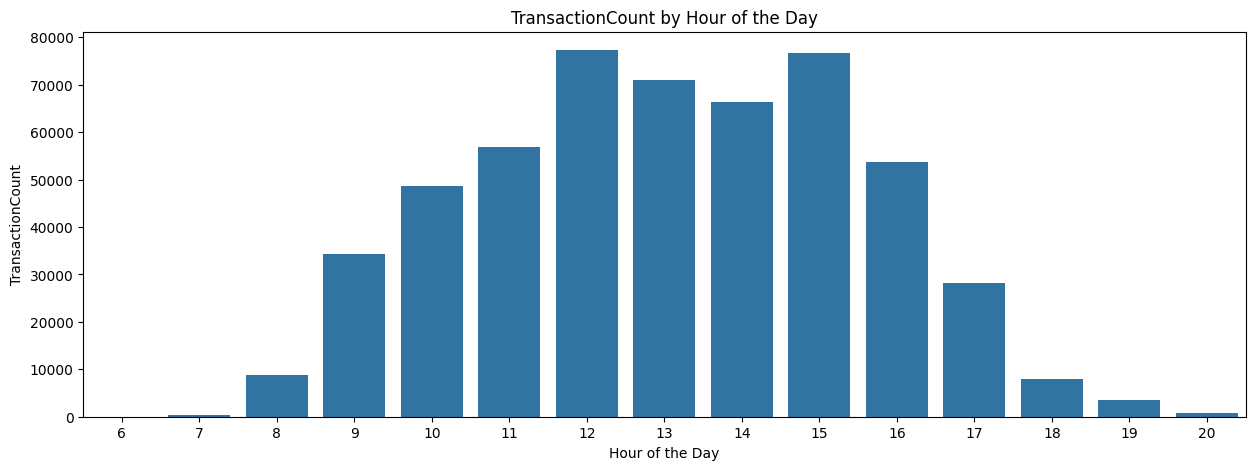

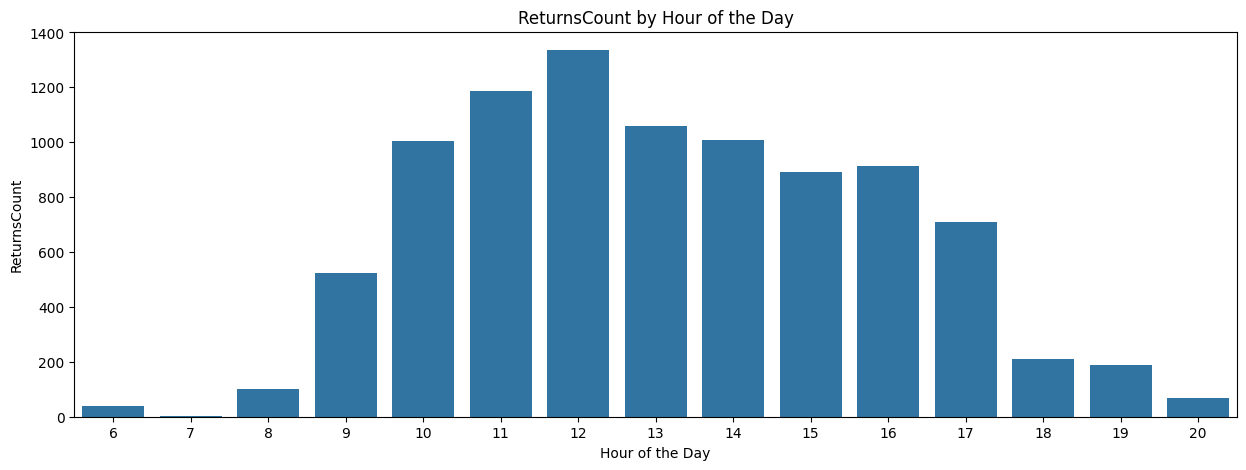

In [20]:
for col in df_hourly.columns[1:]:
    plt.figure(figsize=(15, 5))
    sns.barplot(data=df_hourly, x='Hour', y=col)
    plt.title(f"{col} by Hour of the Day")
    plt.xlabel("Hour of the Day")
    plt.ylabel(f'{col}')
    plt.show()

---

# Customer Segmentation

In [45]:
df_users =(
    df.groupby(df['CustomerID'])
    .agg(TotalSpendings=('TotalSales', 'sum'),
         AverageSpendings=('TotalSales', 'mean'),
         TransactionsCount=('InvoiceNo', 'count'),
         ReturnsCount=('TotalSales', lambda x: (x < 0).sum()),
         Country=('Country', 'first')
         )
    .reset_index()
)
df_users['Returns%'] = (df_users['ReturnsCount'] / df_users['TransactionsCount'] * 100).round(2)
df_users['TotalSpendings'] = df_users['TotalSpendings'].round(2)
df_users['AverageSpendings'] = df_users['AverageSpendings'].round(2)
df_users

,CustomerID,TotalSpendings,AverageSpendings,TransactionsCount,ReturnsCount,Country,Returns%
0,12346,0.00,0.00,2,1,United Kingdom,50.00
1,12347,4310.00,23.68,182,0,Iceland,0.00
2,12348,1797.24,57.98,31,0,Finland,0.00
3,12349,1757.55,24.08,73,0,Italy,0.00
4,12350,334.40,19.67,17,0,Norway,0.00
...,...,...,...,...,...,...,...
4362,18280,180.60,18.06,10,0,United Kingdom,0.00
4363,18281,80.82,11.55,7,0,United Kingdom,0.00
4364,18282,176.60,13.58,13,1,United Kingdom,7.69
4365,18283,2045.53,2.84,721,0,United Kingdom,0.00


In [49]:
fig = px.scatter(df_users, x='AverageSpendings', y='Returns%', color='TotalSpendings', title='Total Spendings vs Return Percentage of Users',log_x=True, log_y=False, hover_data=['CustomerID', 'Country', 'TransactionsCount'])
fig.show()

---

# Product Analysis

In [22]:
df_products = (
    df.groupby(df['StockCode'])
    .agg(TotalSales = ('TotalSales', 'sum'),
         AverageSales = ('TotalSales', 'mean'),
         TransactionsCount = ('InvoiceNo', 'count'),
         ReturnsCount = ('TotalSales', lambda x: (x < 0).sum()),
         QuantitySold = ('Quantity', 'sum'),
         ProductCategory = ('ProductCategory', 'first'),
         Description = ('Description', 'first')
         )
    .reset_index()
)
df_products['Return%'] = (df_products['ReturnsCount'] / df_products['TransactionsCount']) * 100
df_products

,StockCode,TotalSales,AverageSales,TransactionsCount,ReturnsCount,QuantitySold,ProductCategory,Description,Return%
0,10002,759.89,10.702676,71,0,860,Other,INFLATABLE POLITICAL GLOBE,0.0
1,10080,119.09,5.177826,23,0,325,Other,GROOVY CACTUS INFLATABLE,0.0
2,10120,40.32,1.390345,29,0,192,Other,DOGGY RUBBER,0.0
3,10123C,3.25,1.083333,3,0,5,Gift-Wrap,HEARTS WRAPPING TAPE,0.0
4,10124A,6.72,1.344000,5,0,16,Garden,SPOTS ON RED BOOKCOVER TAPE,0.0
...,...,...,...,...,...,...,...,...,...
3953,gift_0001_20,167.05,16.705000,10,0,20,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£20.00,0.0
3954,gift_0001_30,175.53,25.075714,7,0,7,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£30.00,0.0
3955,gift_0001_40,100.70,33.566667,3,0,3,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£40.00,0.0
3956,gift_0001_50,167.56,41.890000,4,0,4,Gift-Wrap,Dotcomgiftshop Gift Voucher Â£50.00,0.0


---

# Geographic Analysis

In [23]:
df_countries = (
    df.groupby(df['Country'])
    .agg(TotalSales = ('TotalSales', 'sum'),
         AverageSales = ('TotalSales', 'mean'),
         TransactionsCount = ('InvoiceNo', 'count'),
         ReturnsCount = ('TotalSales', lambda x: (x < 0).sum())
         )
    .reset_index()
)
df_countries['Return%'] = (df_countries['ReturnsCount'] / df_countries['TransactionsCount'])*100
df_countries

,Country,TotalSales,AverageSales,TransactionsCount,ReturnsCount,Return%
0,Australia,137009.770,108.910787,1258,74,5.882353
1,Austria,10154.320,25.322494,401,3,0.748130
2,Bahrain,548.400,28.863158,19,1,5.263158
3,Belgium,40910.960,19.773301,2069,38,1.836636
4,Brazil,1143.600,35.737500,32,0,0.000000
5,Canada,3666.380,24.280662,151,0,0.000000
6,Channel Islands,20076.390,26.520991,757,10,1.321004
7,Cyprus,12858.760,21.045434,611,8,1.309329
8,Czech Republic,707.720,23.590667,30,5,16.666667
9,Denmark,18768.140,48.247147,389,9,2.313625


---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [24]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)